# **CDC Diabetes Health Indicators (BRFSS-2014) Machine Learning Project**
This notebook analyses and trains various Machine Learning algorithms to solve a binary classification problem if a person is "Pre-Diabetic/Diabetes" or "No Diabetes" using the dataset on UCI Repo. <br/> <br/>

**Dataset Link:** <br/>
https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators


<br/>

### CSCI218 - Group Assignment
**Group 32**

*   Ng Teng Boon (8963794)
*   Jeslyn Ho Ka Yan (8535383)
*   Lester Liam Chong Bin (7558752)
*   Micah Angeles Josephine Flores (8575289)
*   Chea Darayuth (8550864)
*   Bryce Nicolas Fernandez Sumcad (8561369)

<br/><hr/>


### **Install Required Packages**


In [4]:
# !pip install ucimlrepo
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn
# !pip install xgboost
# !pip install imbalanced-learn

# **Import Required Libraries & Load Dataset**

### **Import Required Libraries**
This section imports all necessary Python libraries for:
- Data Manipulation (`pandas`, `numpy`)
- Visualization (`matplotlib`, `seaborn`)
- ML Pipelines (`scikit-learn`, `xgboost` models, preprocessing, feature_selection, pipelines)
- Resampling Datasets (`imblearn`)


In [5]:
# UCI Repo
from ucimlrepo import fetch_ucirepo

# Common Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint

# Scikit-Learn
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Models
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from xgboost import XGBClassifier

## Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Imbalanced Dataset Sampling
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks, NearMiss

import warnings
warnings.filterwarnings("ignore")

### **Fetch Dataset from UCI Repository**
Fetch the dataset using `fetch_ucirepo`. <br/>
[CDC Diabetes Health Indicators | UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators)

In [6]:
# Fetch Dataset from UCI
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)
print("Successfully Fetched Dataset from UCI Repo")

Successfully Fetched Dataset from UCI Repo


### **Retrieve Metadata**
Extracting metadata from the dataset to understand feature descriptions, target variables, and dataset properties.

In [7]:
# Retrieve Metadata
metadata = cdc_diabetes_health_indicators.metadata
print(metadata)

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

### **Data Preparation**
- Extracting features (X) and target (Y) variables from the dataset.
- Combining them into a single DataFrame (`cdc_df`) for easier handling.

In [8]:
# Concat Feature & Target Variables into Full DataFrame
#Source: "https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset"
X = pd.DataFrame(cdc_diabetes_health_indicators.data.features)  # Features
Y = pd.DataFrame(cdc_diabetes_health_indicators.data.targets)   # Targets

cdc_df = pd.concat([X, Y], axis=1)
cdc_df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0


### **Describe Dataset:**
- Displays dataset dimensions and column information.
- Helps understand dataset structure before processing.

In [9]:
# Describe Dataset
nrow, ncol = cdc_df.shape
print("-------------------")
print("Dataset Information")
print("-------------------")
print(f"Number of Rows: {nrow}")
print(f"Number of Columns: {ncol}")
print("-------------------\n")

# Column Info
cdc_df.info()
print("-------------------\n")

-------------------
Dataset Information
-------------------
Number of Rows: 253680
Number of Columns: 22
-------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth 

### **Dataset Summary**
The dataset consists of **253,680 records** and **22 features**, taking up approximately **42.6 MB** of memory. All columns are of integer type (`int64`).

* **Target Variable:** Diabetes_binary (1 = Diabetic, 0 =
Non-Diabetic).
* **Health Indicators:** Blood pressure, cholesterol, BMI, smoking status, physical activity, and diet habits.
* **Demographic Attributes:** Age, sex, education level, and income.
* **Healthcare Access:** Presence of healthcare coverage and barriers to medical consultation.
* **Well-being Factors:** General, mental, and physical health status.

This dataset integrates medical, lifestyle, and socioeconomic factors, providing a comprehensive foundation for diabetes risk analysis.

In [10]:
# Describe Dataset
cdc_df.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875,0.139333
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148,0.346294
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,0.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,0.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


array([[<Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Smoker'}>],
       [<Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>,
        <Axes: title={'center': 'Veggies'}>],
       [<Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>,
        <Axes: title={'center': 'MentHlth'}>],
       [<Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Income'}>,
        <Axes: title={'center'

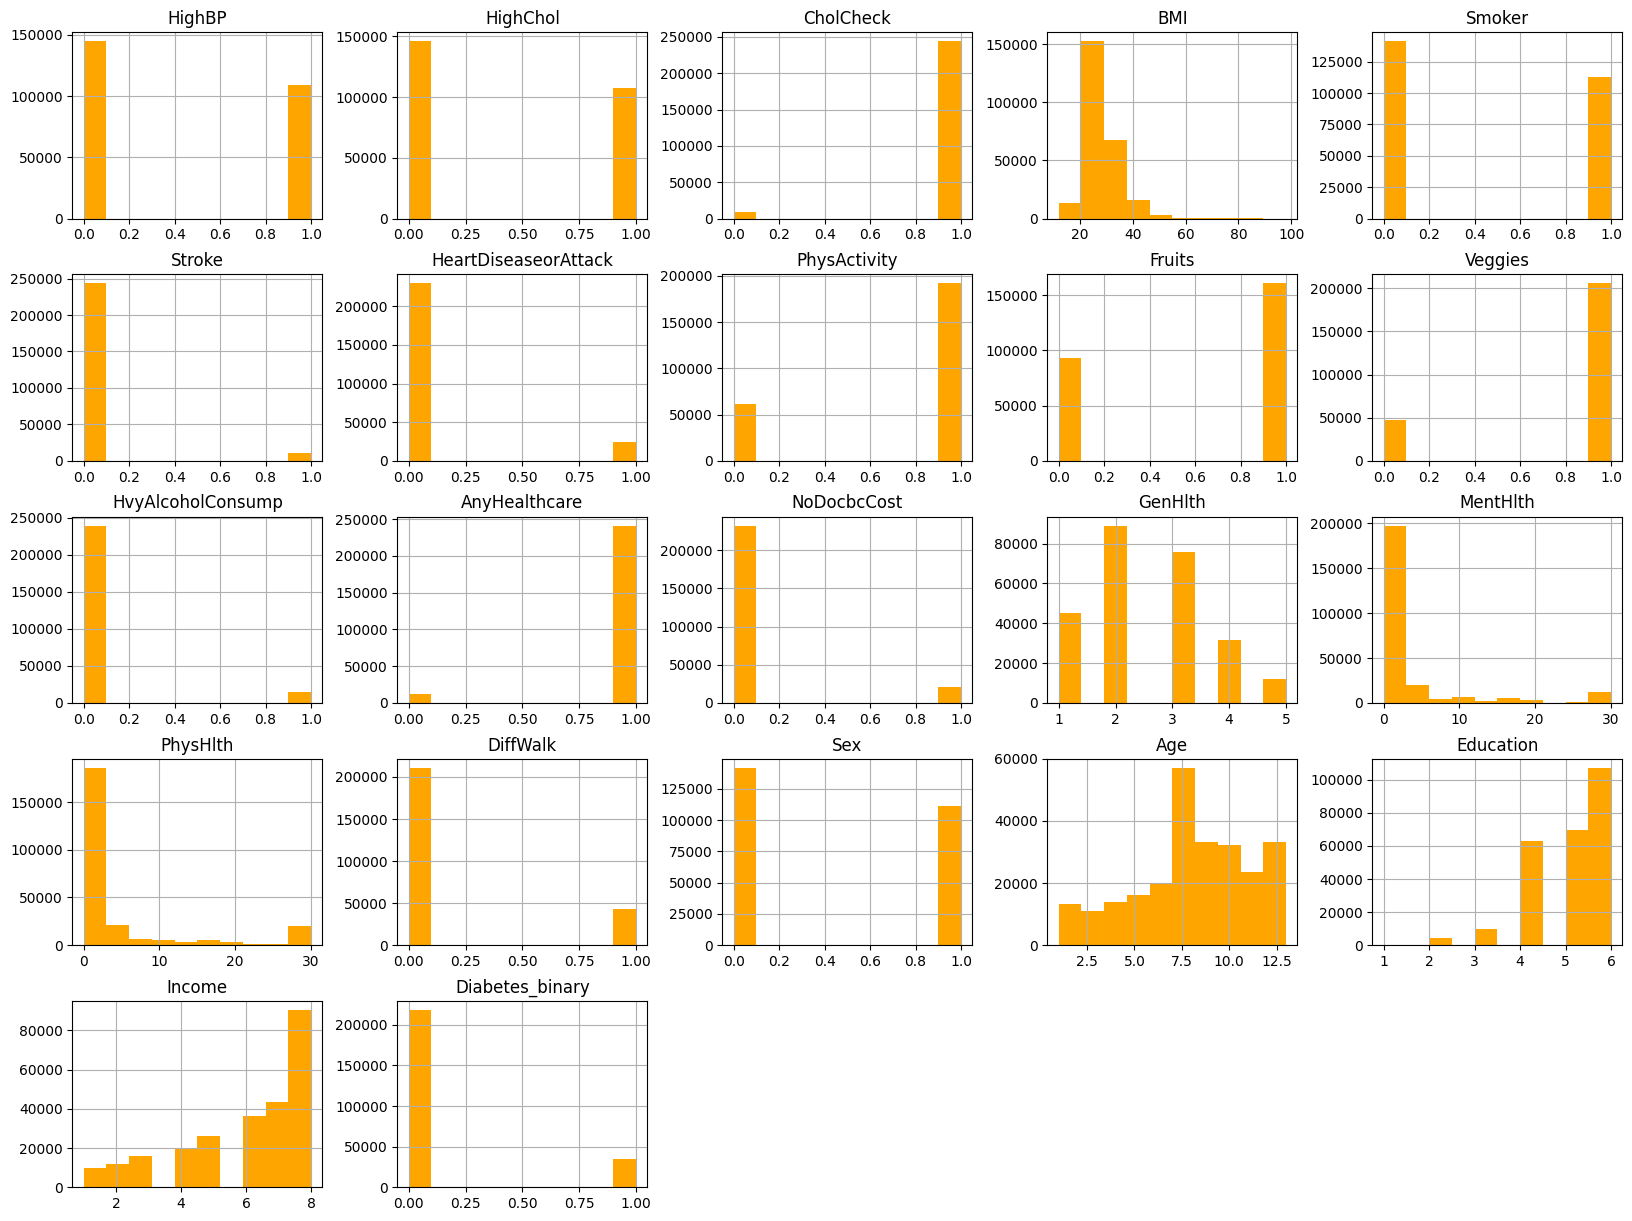

In [11]:
# Plot a Histogram for Entire Dataset Features
cdc_df.hist(bins=10, figsize=(20,15), color='orange')

<hr/>

# **Data Processing 1**

Given that the dataset consists solely of numerical (integer) and binary features, the initial step focuses on basic data cleaning tasks. These include handling any missing values and removing duplicate rows to ensure data consistency and accuracy.

In [12]:
# Check if there exists any missing values
print("Missing Values Exists(?) - ", cdc_df.isnull().values.any())

Missing Values Exists(?) -  False


In [13]:
# Check for Duplicate Values
print("Before Drop Duplicates:")
print(cdc_df.shape)

# Drop Duplicates
cdc_df.drop_duplicates(inplace=True)

# Reset Index
cdc_df.reset_index(drop=True, inplace=True)

print("After Drop Duplicates:")
print(cdc_df.shape)

Before Drop Duplicates:
(253680, 22)
After Drop Duplicates:
(229474, 22)


<hr/>

# Exploratory Data Analysis

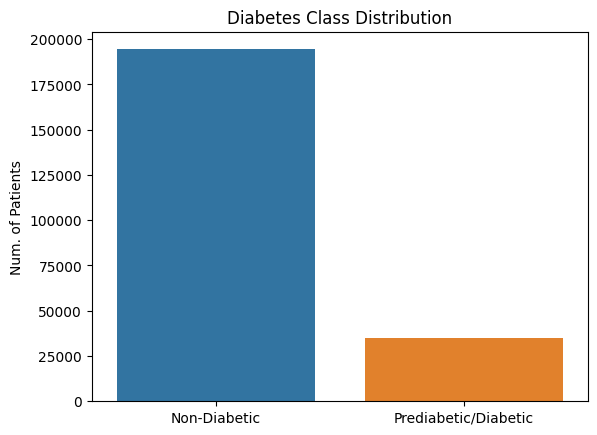

In [ ]:
# Diabetes Class Distribution
diabetes_binary_str = cdc_df['Diabetes_binary'].map({0: 'Non-Diabetic', 1: 'Prediabetic/Diabetic'})
sns.countplot(x=diabetes_binary_str, hue=diabetes_binary_str)
plt.title("Diabetes Class Distribution")
plt.xlabel(None)
plt.ylabel("Num. of Patients")
plt.show()

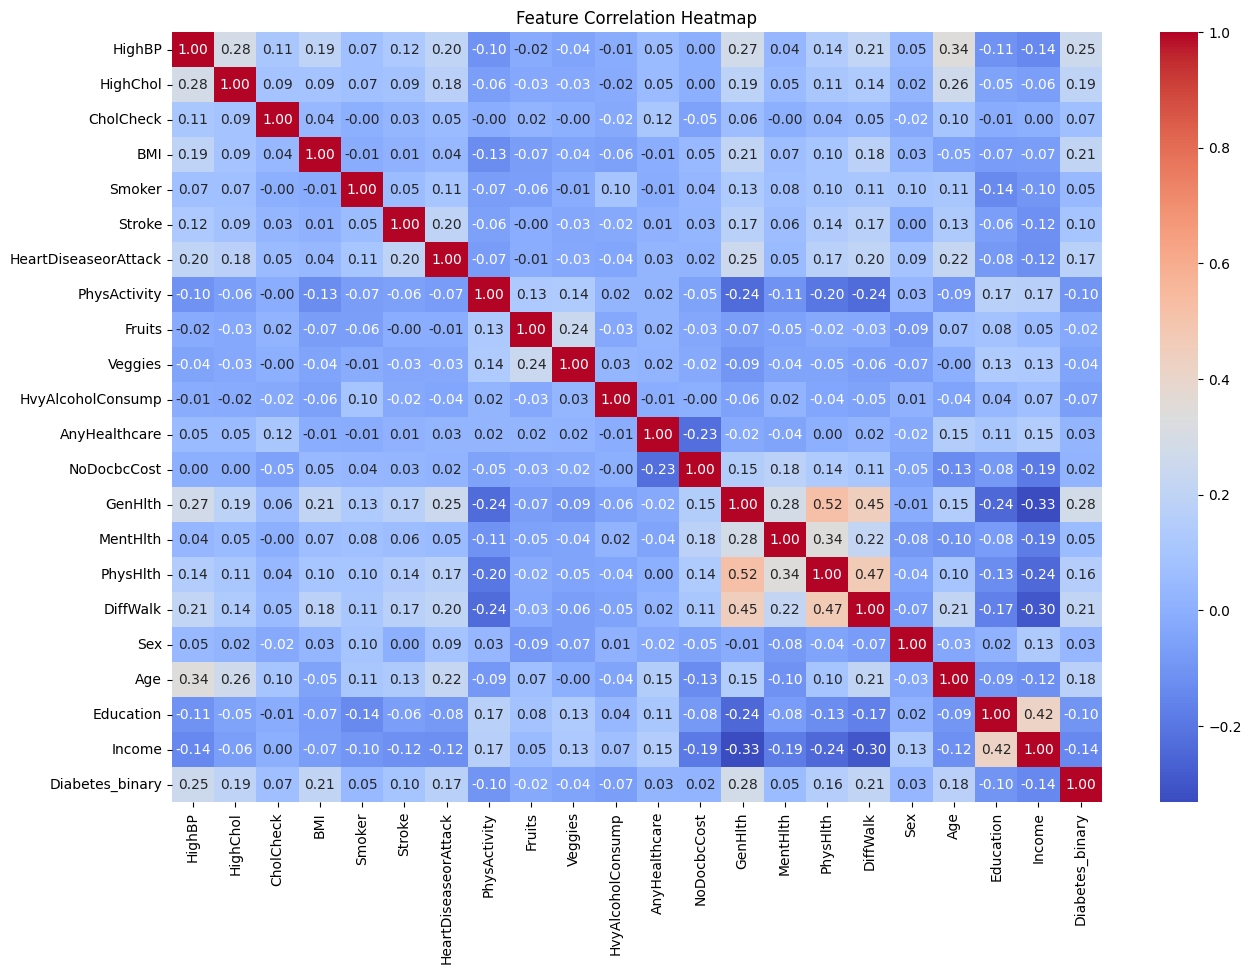

In [ ]:
# Feature Correlation Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(cdc_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

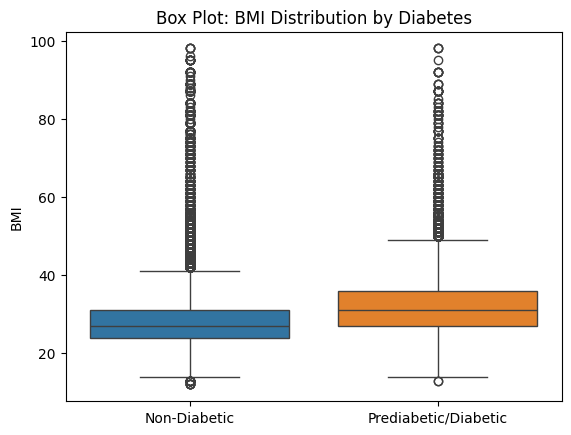

In [ ]:
# Box Plot: BMI Distribution by Diabetes
sns.boxplot(x=diabetes_binary_str, y=cdc_df['BMI'], hue=diabetes_binary_str)
plt.title("Box Plot: BMI Distribution by Diabetes")
plt.xlabel(None)
plt.ylabel("BMI")
plt.show()

In [ ]:
# Converts Age Bucket to String (Taken from Dataset Cookbook)
# Source: https://www.cdc.gov/brfss/annual_data/2014/pdf/codebook14_llcp.pdf (Page 106)
def get_age_group(age):

  age = int(age)

  if age == 1:
    return "18-24"

  elif age == 2:
    return "25-29"

  elif age == 3:
    return "30-34"

  elif age == 4:
    return "35-39"

  elif age == 5:
    return "40-44"

  elif age == 6:
    return "45-49"

  elif age == 7:
    return "50-54"

  elif age == 8:
    return "55-59"

  elif age == 9:
    return "60-64"

  elif age == 10:
    return "65-69"

  elif age == 11:
    return "70-74"

  elif age == 12:
    return "75-79"

  elif age == 13:
    return "80-99"

  else:
    return "Unknown"

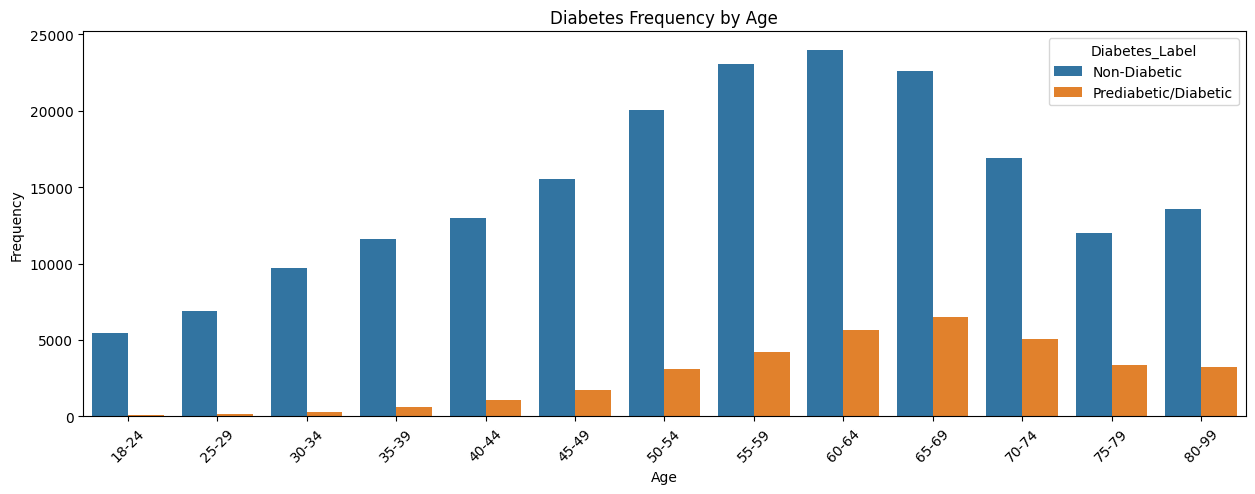

In [ ]:
# Display Diabetes Frequency by Age Count
diabetes_age_df = cdc_df[['Age', 'Diabetes_binary']].copy()
diabetes_age_df['Age_Label'] = diabetes_age_df['Age'].apply(get_age_group)
diabetes_age_df['Diabetes_Label'] = diabetes_age_df['Diabetes_binary'].map(\
                                      {0: 'Non-Diabetic', 1: 'Prediabetic/Diabetic'})

# Group by Age Label & Diabetes Label
diabetes_age_df = diabetes_age_df.groupby(\
                      ['Age_Label', 'Diabetes_Label']\
                  ).size().reset_index(name='Count')


# Plot Seaborn Barchart
plt.figure(figsize=(15, 5))
sns.barplot(x='Age_Label', y='Count', hue='Diabetes_Label', data=diabetes_age_df)
plt.title('Diabetes Frequency by Age')
plt.xlabel('Age')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Compute Correlation of Each Feature with Diabetes_binary
feature_correlations = cdc_df.corr()['Diabetes_binary'].drop('Diabetes_binary').sort_values(ascending=False)

# Display Top 10 Correlated Features
print("\n--Top Features Correlated with `Diabetes_binary`:")
print(feature_correlations.head(10))


--Top Features Correlated with `Diabetes_binary`:
GenHlth                 0.276940
HighBP                  0.254318
DiffWalk                0.205302
BMI                     0.205086
HighChol                0.194944
Age                     0.177263
HeartDiseaseorAttack    0.168213
PhysHlth                0.156211
Stroke                  0.099193
CholCheck               0.072523
Name: Diabetes_binary, dtype: float64


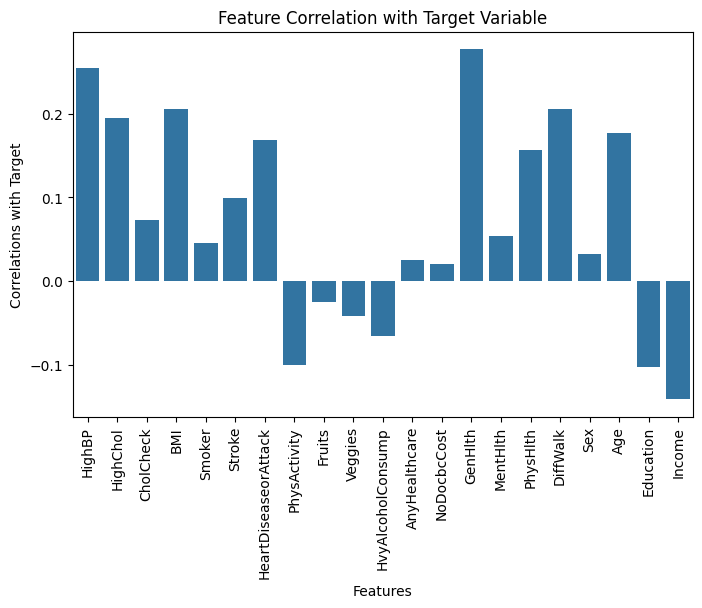

In [ ]:
# Plot Bar Chart of Correlations with Target Variable
corr_matrix = cdc_df.corr()
corr_matrix.drop('Diabetes_binary', axis=0, inplace=True)

# Create new Plot Figure
plt.figure(figsize=(8, 5))

# Configure Plot Labels
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.ylabel("Correlations with Target")
plt.title("Feature Correlation with Target Variable")

# Plot Barplot
sns.barplot(x=corr_matrix.index, y=corr_matrix['Diabetes_binary'])
plt.show()

In [ ]:
# Select Features for Model Training
feature_columns = cdc_df.drop("Diabetes_binary", axis=1).columns.tolist()
X = cdc_df.drop("Diabetes_binary", axis=1)
Y = cdc_df['Diabetes_binary']

# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Train a Random Forest Model
rf_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

rf_pipe.fit(x_train, y_train)

# Get Feature Importance
feature_importance = pd.Series(rf_pipe['rf'].feature_importances_, index=feature_columns).sort_values(ascending=False)

# Display Top 10 Most Important Features
print("\n--Top Features Based on Feature Importance (Random Forest Model):")
print(feature_importance.head(10))


--Top Features Based on Feature Importance (Random Forest Model):
BMI          0.183257
Age          0.123411
Income       0.101802
PhysHlth     0.084853
Education    0.072495
GenHlth      0.066540
MentHlth     0.063766
HighBP       0.040618
Smoker       0.033636
Fruits       0.033587
dtype: float64


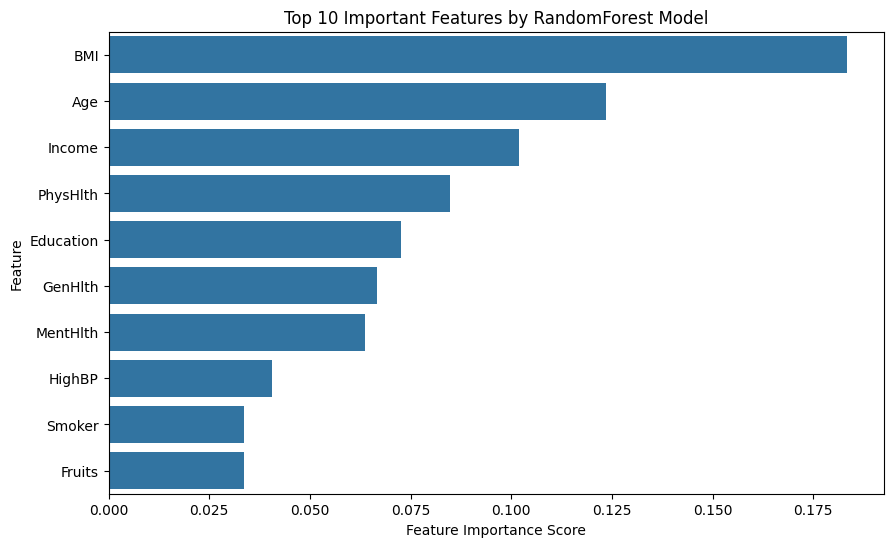

In [ ]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.head(10), y=feature_importance.head(10).index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Top 10 Important Features by RandomForest Model")
plt.show()

# Model Experimentation 1

In [ ]:
# Create Copy of DataFrame
df = cdc_df.copy()

## Feature Engineering & Selection

### High BP + High Chol → Hypertension Risk Score

In [ ]:
# Jeslyn Code
# df['Hypertension_Risk'] = df['HighBP'] + df['HighChol']

# Teng Boon's Code
# df["Hypertension_CVD_Risk"] = pd.cut(
#     df["HighBP"] + df["HighChol"] + df["HeartDiseaseorAttack"] + df["Stroke"],
#     bins=[0, 1, 2, 3, 4, 5], labels=[0, 1, 2, 3, 4]
# )
# df["Hypertension_CVD_Risk"] = df["Hypertension_CVD_Risk"].fillna(0).astype(int)

# Use weighted sum
df["Hypertension_CVD_Risk"] = (
    (df["HighBP"] * 1) + (df["HighChol"] * 1) +
    (df["HeartDiseaseorAttack"] * 2) + (df["Stroke"] * 2)
)

### Hazard Living Score (PA, Fruits, Veggies, Alcohol, Smoker)

In [ ]:
# Hazard Score: Higher value means worse health habits
# df['Hazard_Living_Score'] = (1 - df['PhysActivity']) + (1 - df['Fruits']) + (1 - df['Veggies']) + df['HvyAlcoholConsump'] + df['Smoker']

# (Healthy - 0, Moderate Risk - 1, High Risk - 2)
# df["Lifestyle_Risk"] = pd.cut(
#     (1 - df["PhysActivity"]) + df["HvyAlcoholConsump"] + df["Smoker"],
#     bins=[0, 1, 2, 3], labels=[0, 1, 2]
# ).fillna(0).astype(int)

df["Lifestyle_Risk"] = (
    (1 - df["PhysActivity"] * 1) + (df["HvyAlcoholConsump"] * 1.5) + (df["Smoker"] * 2)
)

In [ ]:
# Intake of fruits and vegetables reduces risk of diabetes by 30%
# df["Nutrition_Index"] = pd.cut(df["Fruits"] + df["Veggies"], bins=[0, 1, 2], labels=[0, 1]).fillna(0).astype(int)

df["Nutrition_Index"] = (
    df["Fruits"] * 1.2 + df["Veggies"] * 1.2
)

In [ ]:
# People with mobility difficulties have higher risk of obesity / diabetes
# Source: Harvard Medical School, 2017
df["Mobility_Limitations"] = pd.cut(
    df["PhysHlth"] + df["DiffWalk"] * 15, bins=[0, 10, 20, 45], labels=[0, 1, 2]
).fillna(0).astype(int)

### Hypothesis Blood Sugar Level Feature

In [ ]:
# Hypothesis Blood Sugar Level Feature
# Combining Exercise, Physical Activity, Physical Health
#df['Blood_Sugar_Hypothesis'] = df['PhysHlth'] * df['PhysActivity']


# Low risk to high risk (0,1,2), then multiplied by PhysActivity to consider if they exercise
# df["PhysHlth_Cat"] = pd.cut(df["PhysHlth"], bins=[0, 5, 15, 30], labels=[0, 1, 2])
# df["PhysHlth_Cat"] = df["PhysHlth_Cat"].fillna(0).astype(int)
# df["Blood_Sugar_Hypothesis"] = df["PhysHlth_Cat"] * df["PhysActivity"]

df["Blood_Sugar_Hypothesis"] = ((30 - df["PhysHlth"]) / 30) * df["PhysActivity"]

In [ ]:
df["SES_Risk_Score"] = (
    np.exp((6 - df["Education"]) / 2) + np.exp((6 - df["Income"]) / 2) + df["NoDocbcCost"]
)

In [ ]:
# Health Index (General, Mental, and Physical Health)
df["Health_Index"] = (df["GenHlth"] + df["MentHlth"] + df["PhysHlth"]) / 3
df["Health_Index_Encoded"] = df["Health_Index"].astype(float)

# Obesity Level Classification (Based on BMI)
def classify_obesity(bmi):
    if bmi < 18.5:
        return 0
    elif bmi < 25:
        return 1
    elif bmi < 30:
        return 2
    else:
        return 3

def get_obesity_label(Obesity_Level):
    Obesity_Level = int(Obesity_Level)
    if Obesity_Level < 0:
        return "Underweight"
    elif Obesity_Level < 1:
        return "Normal"
    elif Obesity_Level < 2:
        return "Overweight"
    else:
        return "Obese"

In [ ]:
df["Obesity_Encoded"] = df["BMI"].apply(classify_obesity)

# Metabolic Syndrome (Obesity + HighBP + HighChol)
df["Metabolic_Syndrome"] = (
    (df["Obesity_Encoded"] == 3) & (df["HighBP"] == 1) & (df["HighChol"] == 1)
).astype(int)

df["MetaSyn_Encoded"] = df["Metabolic_Syndrome"].astype(float)

# Store one-hot encoded version for later usage in Logistic Regression, KNN, and MLP
df_ohe = pd.get_dummies(df, columns=["Obesity_Encoded", "Metabolic_Syndrome"])


# Display first 5 rows
display(df.head())

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,Lifestyle_Risk,Nutrition_Index,Mobility_Limitations,Blood_Sugar_Hypothesis,SES_Risk_Score,Health_Index,Health_Index_Encoded,Obesity_Encoded,Metabolic_Syndrome,MetaSyn_Encoded
0,1,1,1,40,1,0,0,0,0,1,...,3.0,1.2,2,0.0,7.199971,12.666667,12.666667,3,1,1.0
1,0,0,0,25,1,0,0,1,0,0,...,2.0,0.0,0,1.0,14.182494,1.000000,1.000000,2,0,0.0
2,1,1,1,28,0,0,0,0,1,0,...,1.0,1.2,2,0.0,4.086161,21.666667,21.666667,2,0,0.0
3,1,0,1,27,0,0,0,1,1,1,...,0.0,2.4,0,1.0,5.481689,0.666667,0.666667,2,0,0.0
4,1,1,1,24,0,0,0,1,1,1,...,0.0,2.4,0,1.0,4.367003,1.666667,1.666667,1,0,0.0


## Feature Selection by Chi2 Test

In [ ]:
# Extract Feature Column & Target Variable
X = df.drop('Diabetes_binary', axis=1)
Y = df[['Diabetes_binary']]

# Perform Chi-Squared Test
chi2_score, p_val = chi2(X, Y)

# Convert Results into DataFrame
chi2_df = pd.DataFrame(
  {"Feature": X.columns, "chi2_score": chi2_score, "p": p_val}
)

# Display 20 Feature Columns by Highest `chi2_score`
chi2_df = chi2_df.sort_values(by='chi2_score', ascending=False).reset_index(drop=True)
print(chi2_df)

                   Feature    chi2_score              p
0                 PhysHlth  97988.761672   0.000000e+00
1     Health_Index_Encoded  32054.359515   0.000000e+00
2             Health_Index  32054.359515   0.000000e+00
3    Hypertension_CVD_Risk  25906.989788   0.000000e+00
4                      BMI  15507.736174   0.000000e+00
5          MetaSyn_Encoded  13753.168711   0.000000e+00
6       Metabolic_Syndrome  13753.168711   0.000000e+00
7     Mobility_Limitations  12487.680993   0.000000e+00
8           SES_Risk_Score  11667.235526   0.000000e+00
9                 MentHlth  11419.584750   0.000000e+00
10                     Age   8539.906340   0.000000e+00
11                  HighBP   8098.548237   0.000000e+00
12                DiffWalk   7875.496177   0.000000e+00
13                 GenHlth   7671.732832   0.000000e+00
14    HeartDiseaseorAttack   5822.145697   0.000000e+00
15                HighChol   4869.312739   0.000000e+00
16                  Income   3377.099257   0.000

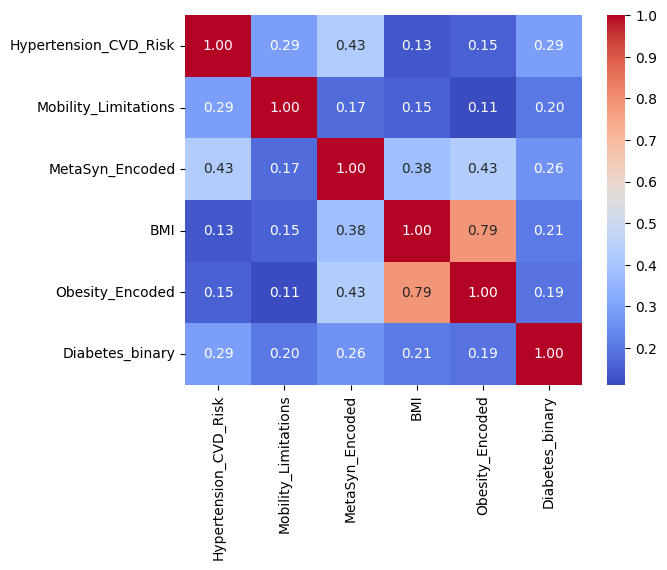

In [ ]:
#Trail and error on our transformation featues combo
#Below is the finalize selected features that yeild the highest accuracy
selected_features = ['Hypertension_CVD_Risk', 'Mobility_Limitations', 'MetaSyn_Encoded', 'BMI', 'Obesity_Encoded', 'Diabetes_binary']
sns.heatmap(df[selected_features].corr(), cmap='coolwarm', annot=True, fmt=".2f")

# Remove Target Variable for Train Test Split
selected_features.remove("Diabetes_binary")

## RF Model on New Features

In [ ]:
X = df[selected_features]
Y = df['Diabetes_binary']

# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Train a Random Forest Model
rf_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=150, random_state=42, class_weight="balanced"))
])

rf_pipe.fit(x_train, y_train)

# Predictions
y_pred = rf_pipe.predict(x_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"\n Best Model: Random Forest")
print(f" Accuracy: {accuracy:.4f}")
print("\n Classification Report:")
print(classification_report(y_test, y_pred))


 Best Model: Random Forest
 Accuracy: 0.6765

 Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.67      0.78     38876
           1       0.28      0.74      0.41      7019

    accuracy                           0.68     45895
   macro avg       0.61      0.70      0.59     45895
weighted avg       0.83      0.68      0.72     45895



## Confusion Matrics - Random Forest

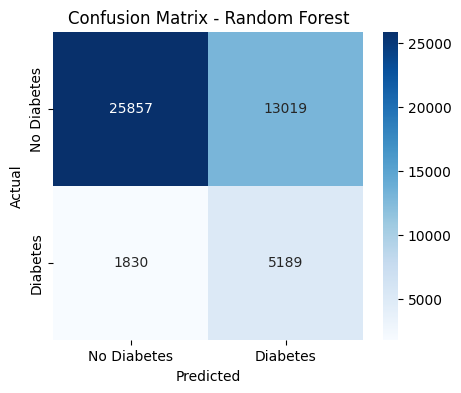

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


## Training Various ML Models

In [ ]:
# Define optimized models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, class_weight="balanced"),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=150, random_state=42, class_weight="balanced"),  # Reduced trees
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', max_depth=5, n_jobs=1),  # Optimized
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=10),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(7, 5, 9), max_iter=500)
}

results = {}
for name, model in models.items():

    ml_pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    print(f"[{name}]")
    ml_pipe.fit(x_train, y_train)
    y_pred = ml_pipe.fit(x_train, y_train).predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("\n")


[Logistic Regression]
Accuracy: 0.7335
              precision    recall  f1-score   support

           0       0.92      0.75      0.83     38876
           1       0.32      0.64      0.42      7019

    accuracy                           0.73     45895
   macro avg       0.62      0.69      0.62     45895
weighted avg       0.83      0.73      0.76     45895



[Decision Tree]
Accuracy: 0.6742
              precision    recall  f1-score   support

           0       0.93      0.66      0.77     38876
           1       0.28      0.75      0.41      7019

    accuracy                           0.67     45895
   macro avg       0.61      0.70      0.59     45895
weighted avg       0.84      0.67      0.72     45895



[Random Forest]
Accuracy: 0.6765
              precision    recall  f1-score   support

           0       0.93      0.67      0.78     38876
           1       0.28      0.74      0.41      7019

    accuracy                           0.68     45895
   macro avg       

## Graph comparison each ML Model performance

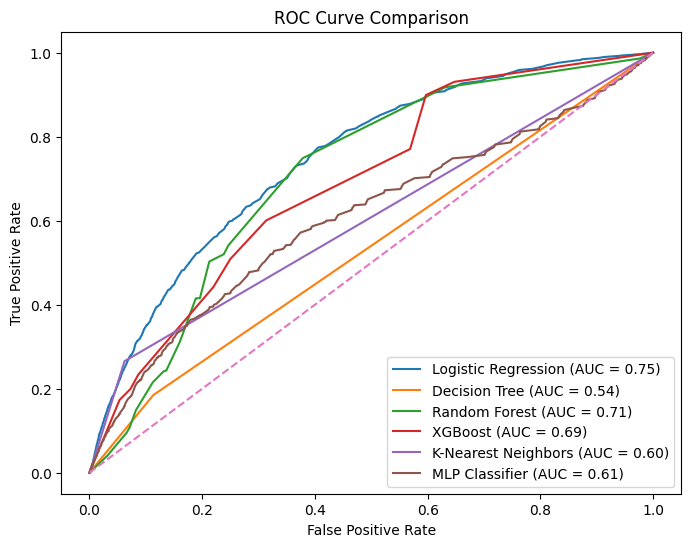

In [ ]:
plt.figure(figsize=(8,6))
for name, model in models.items():
    y_probs = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

# Model Experimentation 2
Looking at the above performance, we can see that aggregating various columns create redundancy. In this section, we only perform 2 feature aggregation (Diabetes Risk Factors by CDC) as well as poor lifestyle metrics.

In [14]:
# Create Copy of DataFrame
df = cdc_df.copy()

## Feature Engineering

### Binning BMI
Convert BMI Values into Discrete Bins <br/>
**Source:** https://www.cdc.gov/bmi/adult-calculator/bmi-categories.html

In [15]:
# Convert BMI to Discrete Bins
# 0: (Underweight)        <= 17
# 1: (Normal)             >= 18 & < 25
# 2: (Overweight)         >= 25 & < 30
# 3: (Class 1 Obesity)    >= 30 & < 35
# 4: (Class 2 Obesity)    >= 35 & < 40
# 5: (Class 3 Obesity)    >= 40

df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 17, 24, 29, 34, 39, float('inf')], labels=[0, 1, 2, 3, 4, 5])
df[['BMI_Category', 'Diabetes_binary']].groupby('BMI_Category').value_counts().sort_index()

BMI_Category  Diabetes_binary
0             0                   1223
              1                     86
1             0                  56592
              1                   3993
2             0                  72158
              1                  10565
3             0                  40500
              1                  10193
4             0                  14795
              1                   5653
5             0                   9109
              1                   4607
Name: count, dtype: int64

In [16]:
# Convert BMI Bins into String Labels
def get_bmi_label(bmi):
  bmi = int(bmi)

  if bmi == 0:
    return "Underweight"

  elif bmi == 1:
    return "Normal"

  elif bmi == 2:
    return "Overweight"

  elif bmi == 3:
    return "Class 1 Obesity"

  elif bmi == 4:
    return "Class 2 Obesity"

  else:
    return "Class 3 Obesity"

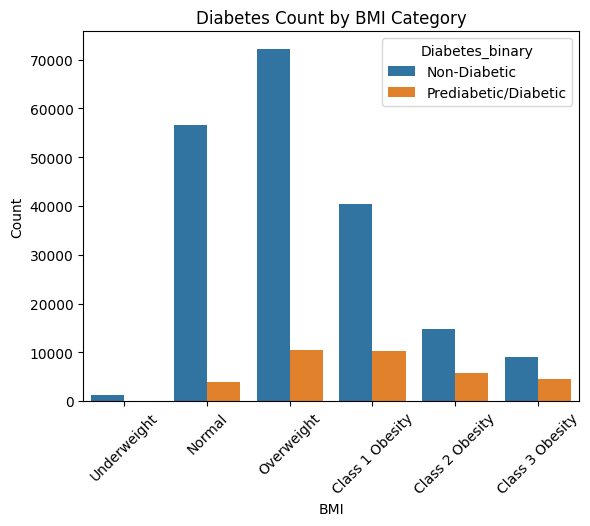

In [17]:
# Plot Diabetes by BMI Category (Obesity Level)
diabetes_bmi_df = df[['BMI_Category', 'Diabetes_binary']].copy()
diabetes_bmi_df['BMI_Category'] = diabetes_bmi_df['BMI_Category'].apply(get_bmi_label)
diabetes_bmi_df['Diabetes_binary'] = diabetes_bmi_df['Diabetes_binary'].map({0: 'Non-Diabetic', 1: 'Prediabetic/Diabetic'})

diabetes_bmi_df = diabetes_bmi_df.groupby(['BMI_Category', 'Diabetes_binary']).size().reset_index(name='Count')

sns.barplot(x=diabetes_bmi_df['BMI_Category'], y=diabetes_bmi_df['Count'], hue=diabetes_bmi_df['Diabetes_binary'])
plt.title('Diabetes Count by BMI Category')
plt.xlabel('BMI')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

We can observe that most patients who are diabetic are overweight or obese. However, can can also see that there still exists patients who are normal weight that are diabetic too.

<hr/>

### Diabetes Risk Factors by Aggregating Features
**Source:** https://www.cdc.gov/diabetes/risk-factors/index.html

In [18]:
# High Risk Factor:
# High Blood Pressure, High Cholesterol, Obesity

isHighBP = df['HighBP'] == 1
isHighChol = df['HighChol'] == 1
isObese = df['BMI_Category'] >= 2

df['HighRiskFactor'] =  (isHighBP & isHighChol & isObese).astype(int)

print(df[['Diabetes_binary', 'HighRiskFactor']].head(5))
print('--------------------')
print(df[['Diabetes_binary', 'HighRiskFactor']].groupby('HighRiskFactor').value_counts().sort_index())

   Diabetes_binary  HighRiskFactor
0                0               1
1                0               0
2                0               1
3                0               0
4                0               0
--------------------
HighRiskFactor  Diabetes_binary
0               0                  159989
                1                   17857
1               0                   34388
                1                   17240
Name: count, dtype: int64


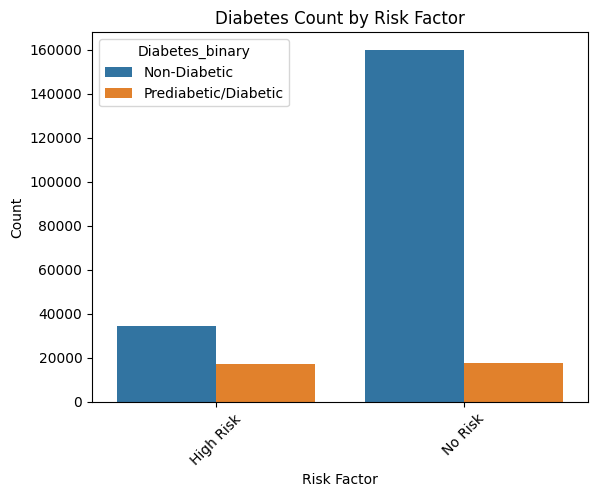

In [19]:
# Plot Diabetes by Risk Factor
diabetes_risk_df = df[['HighRiskFactor', 'Diabetes_binary']].copy()
diabetes_risk_df['HighRiskFactor'] = diabetes_risk_df['HighRiskFactor'].map({0: 'No Risk', 1: 'High Risk'})
diabetes_risk_df['Diabetes_binary'] = diabetes_risk_df['Diabetes_binary'].map({0: 'Non-Diabetic', 1: 'Prediabetic/Diabetic'})

diabetes_risk_df = diabetes_risk_df.groupby(['HighRiskFactor', 'Diabetes_binary']).size().reset_index(name='Count')

sns.barplot(x=diabetes_risk_df['HighRiskFactor'], y=diabetes_risk_df['Count'], hue=diabetes_risk_df['Diabetes_binary'])
plt.title('Diabetes Count by Risk Factor')
plt.xlabel('Risk Factor')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

The Barplot shows that majority of non-diabetic patient have Low to No Risk side. However, we can also observe that diabetes is present equally in both High Risk and Low Risk.

In [ ]:
# Poor Lifestyle Factor
# No Physical Activity, Smoker, Alchohol, Bad Diet

notPhysActive = df['PhysActivity'] == 0
isSmoker = df['Smoker'] == 1
isHeavyDrinker = df['HvyAlcoholConsump'] == 1
hasPoorDiet = ((df['Fruits'] == 0) & (df['Veggies'] == 0))

df['poorLifestyle'] =  (notPhysActive | isSmoker | isHeavyDrinker | hasPoorDiet).astype(int)
print(df[['Diabetes_binary', 'poorLifestyle']].head(5))
print('--------------------')
print(df[['Diabetes_binary', 'poorLifestyle']].groupby('poorLifestyle').value_counts().sort_index())

   Diabetes_binary  poorLifestyle
0                0              1
1                0              1
2                0              1
3                0              0
4                0              0
--------------------
poorLifestyle  Diabetes_binary
0              0                   70852
               1                    9656
1              0                  123525
               1                   25441
Name: count, dtype: int64


## Feature Selection by Chi2 Test

In [ ]:
# Extract Feature Column & Target Variable
X = df.drop('Diabetes_binary', axis=1)
Y = df[['Diabetes_binary']]

# Perform Chi-Squared Test
chi2_score, p_val = chi2(X, Y)

# Convert Results into DataFrame
chi2_df = pd.DataFrame(
  {"Feature": X.columns, "chi2_score": chi2_score, "p": p_val}
)

# Display Feature Columns by Highest `chi2_score`
print(chi2_df.sort_values(by='chi2_score', ascending=False).reset_index(drop=True))

                 Feature    chi2_score              p
0               PhysHlth  97988.761672   0.000000e+00
1                    BMI  15507.736174   0.000000e+00
2         HighRiskFactor  13052.919598   0.000000e+00
3               MentHlth  11419.584750   0.000000e+00
4                    Age   8539.906340   0.000000e+00
5                 HighBP   8098.548237   0.000000e+00
6               DiffWalk   7875.496177   0.000000e+00
7                GenHlth   7671.732832   0.000000e+00
8           BMI_Category   6150.076576   0.000000e+00
9   HeartDiseaseorAttack   5822.145697   0.000000e+00
10              HighChol   4869.312739   0.000000e+00
11                Income   3377.099257   0.000000e+00
12                Stroke   2156.678382   0.000000e+00
13     HvyAlcoholConsump    937.401148  7.268457e-206
14          PhysActivity    617.563886  2.532822e-136
15             Education    479.112939  3.332472e-106
16         poorLifestyle    365.894763   1.465699e-81
17                Smoker    

In [ ]:
# Display top 15 features based on chi2_score
best_feat_cols = chi2_df.sort_values(by='chi2_score', ascending=False).head(15)
best_feat_cols = best_feat_cols['Feature'].to_list()
print("Num of Features: ", len(best_feat_cols))
pprint.pp(best_feat_cols)

Num of Features:  15
['PhysHlth',
 'BMI',
 'HighRiskFactor',
 'MentHlth',
 'Age',
 'HighBP',
 'DiffWalk',
 'GenHlth',
 'BMI_Category',
 'HeartDiseaseorAttack',
 'HighChol',
 'Income',
 'Stroke',
 'HvyAlcoholConsump',
 'PhysActivity']


<Axes: >

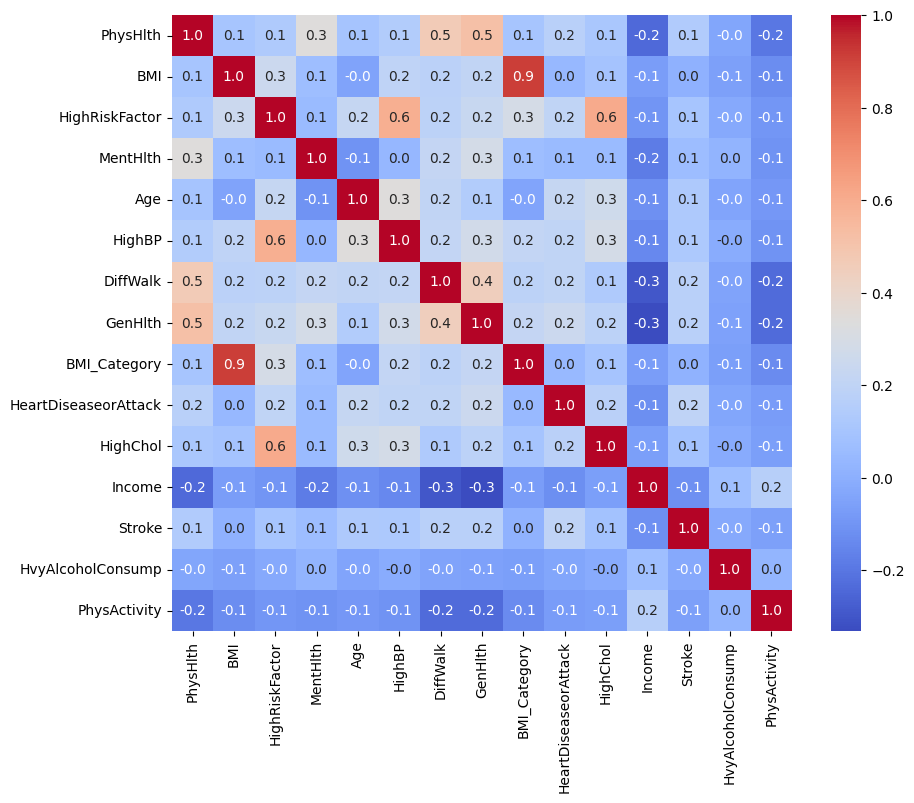

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[best_feat_cols].corr(), annot=True, cmap='coolwarm', fmt=".1f")

In [ ]:
# Drop aggregated features (BMI, HighChol, BP)
best_feat_cols.remove('BMI_Category')
best_feat_cols.remove('HighChol')
best_feat_cols.remove('HighBP')

print("Num of Features: ", len(best_feat_cols))
pprint.pp(best_feat_cols)

# Append target variable
best_feat_cols.append('Diabetes_binary')

Num of Features:  12
['PhysHlth',
 'BMI',
 'HighRiskFactor',
 'MentHlth',
 'Age',
 'DiffWalk',
 'GenHlth',
 'HeartDiseaseorAttack',
 'Income',
 'Stroke',
 'HvyAlcoholConsump',
 'PhysActivity']


## Training Various ML Models
**(Over & Under Sampling with `imbalanced-learn` package)**

We applied different sampling strategies to evaluate how it affects model performances. Our finding & observations can be found near the end of the notebook.

Reference:
https://imbalanced-learn.org/stable/references/index.html

In [ ]:
# Evaluation Function
def evaluateModel(y_true, y_pred):
    """
    Prints Evaluations Metrics for Predicted Values
    :y_true: True Labels
    :y_pred: Predicted Labels.
    """

    # Accuracy, Specificity & Sensitivity
    print(f"Accuracy: {round(accuracy_score(y_true, y_pred) * 100, 2)}%")
    print("------------------------------\n")

    # Classificaion Report
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print("------------------------------\n")

In [ ]:
preprocessed_df = df[best_feat_cols].copy()

X = preprocessed_df.drop('Diabetes_binary', axis=1)
Y = preprocessed_df['Diabetes_binary']

# Split Training (80%) & Test Datasets (20%)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state=42)

In [ ]:
# Print Train/Test Value Count

print("Training Dataset Value Count:")
total_train_records = len(y_train)
print(f"Total Records: {total_train_records}")
print("-------------------------------------")
label, count = np.unique(y_train, return_counts=True)

for i in range(0, len(label)):
    if i == 0:
      print(f"No Diabetes: {count[i]} | {round((count[i] / total_train_records) * 100, 2)}%")
    else:
      print(f"Diabetic / Prediabetic: {count[i]} | {round((count[i] / total_train_records) * 100, 2)}%")

Training Dataset Value Count:
Total Records: 183579
-------------------------------------
No Diabetes: 155501 | 84.71%
Diabetic / Prediabetic: 28078 | 15.29%


### Without Sampling

In [ ]:
def trainModels(x_train, y_train, x_test, y_test):

  # Ridge Classifier
  ridge_pipe = Pipeline([
      ('scalar', StandardScaler()),
      ('classifier', RidgeClassifier(class_weight="balanced", random_state=42))
  ])

  ## Fit Ridge Model
  ridge_pipe.fit(x_train, y_train)

  ## Testing Evaluation
  print("Ridge Classifier (Testing):")
  y_pred = ridge_pipe.predict(x_test)
  evaluateModel(y_test, y_pred)

  # ======================================= #

  # Random Forest
  rf_pipe = Pipeline([
      ('scalar', StandardScaler()),
      ('classifier', RandomForestClassifier(class_weight="balanced", random_state=42))
  ])

  ## Fit Forest Model
  rf_pipe.fit(x_train, y_train)

  ## Testing Evaluation
  print("RandomForest (Testing):")
  y_pred = rf_pipe.predict(x_test)
  evaluateModel(y_test, y_pred)

  # ======================================= #

  # Gaussian Naive Bayes
  nb_pipe = Pipeline([
      ('scalar', StandardScaler()),
      ('classifier', GaussianNB())
  ])

  ## Fit Naive Bayes Model
  nb_pipe.fit(x_train, y_train)

  ## Testing Evaluation
  print("Gaussian NB (Testing):")
  y_pred = nb_pipe.predict(x_test)
  evaluateModel(y_test, y_pred)

  # ======================================= #

  # XGBoost
  xgb_pipe = Pipeline([
      ('scalar', StandardScaler()),
      ('classifier', XGBClassifier(random_state=42))
  ])

  ## Fit XGBoost Model
  xgb_pipe.fit(x_train, y_train)

  ## Testing Evaluation
  print("XGBoost (Testing):")
  y_pred = xgb_pipe.predict(x_test)
  evaluateModel(y_test, y_pred)

  # ======================================= #


  """
  # MLP Classifier
  n1: Size of input layer + Size of the output layer
  n2: 2/3 Size of input layer + Size of the output layer
  n3: Less than twice the size of the input layer
  """
  n1 = 12 + 2
  n2 = int((0.67 * 12)) + 2
  n3 = (12 * 2) - 1

  mlp_pipe = Pipeline([
      ('scalar', StandardScaler()),
      ('classifier', MLPClassifier(
                      hidden_layer_sizes=(n1, n2, n3), activation='relu', solver='adam',
                      max_iter=1000, random_state=42, early_stopping=True))
  ])

  ## Fit MLP Classifier Model
  mlp_pipe.fit(x_train, y_train)

  ## Testing Evaluation
  print("MLP Classifier (Testing):")
  y_pred = mlp_pipe.predict(x_test)
  evaluateModel(y_test, y_pred)

In [ ]:
# Train Models without Sampling Data
trainModels(x_train, y_train, x_test, y_test)

Ridge Classifier (Testing):
Accuracy: 72.24%
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.72      0.81     38876
           1       0.32      0.73      0.44      7019

    accuracy                           0.72     45895
   macro avg       0.63      0.72      0.63     45895
weighted avg       0.84      0.72      0.76     45895

------------------------------

RandomForest (Testing):
Accuracy: 80.52%
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     38876
           1       0.33      0.26      0.29      7019

    accuracy                           0.81     45895
   macro avg       0.60      0.58      0.59     45895
weighted avg       0.79      0.81      0.80     45895

------------------------------

Gaussian NB (Testing):
Accuracy: 77.68%
------------------------------

Classification

### Oversampling by SMOTE

In [ ]:
# Apply Oversampling Technique (k=5)
smo = SMOTE(random_state=42, k_neighbors=5)
x_train_resampled, y_train_resampled = smo.fit_resample(x_train, y_train)

In [ ]:
# Print Training Data Value Count (after over-sampling)
print("Training Dataset Value Count (After SMOTE Over-Sampling):")
print("Training Dataset Value Count:")
total_train_records = len(y_train_resampled)
print(f"Total Records: {total_train_records}")
print("-------------------------------------")
label, count = np.unique(y_train_resampled, return_counts=True)

for i in range(0, len(label)):
    if i == 0:
      print(f"No Diabetes: {count[i]} | {round((count[i] / total_train_records) * 100, 2)}%")
    else:
      print(f"Diabetic / Prediabetic: {count[i]} | {round((count[i] / total_train_records) * 100, 2)}%")

Training Dataset Value Count (After SMOTE Over-Sampling):
Training Dataset Value Count:
Total Records: 311002
-------------------------------------
No Diabetes: 155501 | 50.0%
Diabetic / Prediabetic: 155501 | 50.0%


In [ ]:
print("Model with SMOTE Oversampling (k_neighbours=5)")
print("==============================================")
trainModels(x_train_resampled, y_train_resampled, x_test, y_test)

Model with SMOTE Oversampling (k_neighbours=5)
Ridge Classifier (Testing):
Accuracy: 69.87%
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.69      0.80     38876
           1       0.30      0.73      0.42      7019

    accuracy                           0.70     45895
   macro avg       0.62      0.71      0.61     45895
weighted avg       0.84      0.70      0.74     45895

------------------------------

RandomForest (Testing):
Accuracy: 73.48%
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83     38876
           1       0.29      0.49      0.36      7019

    accuracy                           0.73     45895
   macro avg       0.59      0.64      0.60     45895
weighted avg       0.80      0.73      0.76     45895

------------------------------

Gaussian NB (Testing):
Accuracy: 65.01%

In [ ]:
# Apply Oversampling Technique (k=3)
smo = SMOTE(random_state=42, k_neighbors=3)
x_train_resampled, y_train_resampled = smo.fit_resample(x_train, y_train)

print("Model with SMOTE Oversampling (k_neighbours=3)")
trainModels(x_train_resampled, y_train_resampled, x_test, y_test)

Model with SMOTE Oversampling (k_neighbours=3)
Ridge Classifier (Testing):
Accuracy: 70.09%
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.70      0.80     38876
           1       0.30      0.73      0.43      7019

    accuracy                           0.70     45895
   macro avg       0.62      0.71      0.61     45895
weighted avg       0.84      0.70      0.74     45895

------------------------------

RandomForest (Testing):
Accuracy: 74.48%
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84     38876
           1       0.29      0.47      0.36      7019

    accuracy                           0.74     45895
   macro avg       0.59      0.63      0.60     45895
weighted avg       0.80      0.74      0.77     45895

------------------------------

Gaussian NB (Testing):
Accuracy: 65.42%

In [ ]:
# Apply Oversampling Technique (k=7)
smo = SMOTE(random_state=42, k_neighbors=7)
x_train_resampled, y_train_resampled = smo.fit_resample(x_train, y_train)

print("Model with SMOTE Oversampling (k_neighbours=7)")
trainModels(x_train_resampled, y_train_resampled, x_test, y_test)

Model with SMOTE Oversampling (k_neighbours=7)
Ridge Classifier (Testing):
Accuracy: 69.72%
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.69      0.79     38876
           1       0.30      0.73      0.42      7019

    accuracy                           0.70     45895
   macro avg       0.62      0.71      0.61     45895
weighted avg       0.84      0.70      0.74     45895

------------------------------

RandomForest (Testing):
Accuracy: 72.5%
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.76      0.82     38876
           1       0.28      0.51      0.36      7019

    accuracy                           0.73     45895
   macro avg       0.59      0.64      0.59     45895
weighted avg       0.80      0.73      0.75     45895

------------------------------

Gaussian NB (Testing):
Accuracy: 64.63%


In [ ]:
# Apply Oversampling Technique (k=10)
smo = SMOTE(random_state=42, k_neighbors=10)
x_train_resampled, y_train_resampled = smo.fit_resample(x_train, y_train)

print("Model with SMOTE Oversampling (k_neighbours=10)")
trainModels(x_train_resampled, y_train_resampled, x_test, y_test)

Model with SMOTE Oversampling (k_neighbours=10)
Ridge Classifier (Testing):
Accuracy: 69.65%
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.69      0.79     38876
           1       0.30      0.72      0.42      7019

    accuracy                           0.70     45895
   macro avg       0.62      0.71      0.61     45895
weighted avg       0.84      0.70      0.74     45895

------------------------------

RandomForest (Testing):
Accuracy: 71.96%
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82     38876
           1       0.28      0.53      0.36      7019

    accuracy                           0.72     45895
   macro avg       0.59      0.64      0.59     45895
weighted avg       0.80      0.72      0.75     45895

------------------------------

Gaussian NB (Testing):
Accuracy: 64.17

### Oversampling by ADASYN

In [ ]:
# Apply ADASYN Oversampling
adasyn = ADASYN(random_state=42, n_neighbors=5)
x_train_resampled, y_train_resampled = adasyn.fit_resample(x_train, y_train)

In [ ]:
# Print Training Data Value Count (after over-sampling)
print("Training Dataset Value Count (After ADASYN Over-Sampling):")
print("Training Dataset Value Count:")
total_train_records = len(y_train_resampled)
print(f"Total Records: {total_train_records}")
print("-------------------------------------")
label, count = np.unique(y_train_resampled, return_counts=True)

for i in range(0, len(label)):
    if i == 0:
      print(f"No Diabetes: {count[i]} | {round((count[i] / total_train_records) * 100, 2)}%")
    else:
      print(f"Diabetic / Prediabetic: {count[i]} | {round((count[i] / total_train_records) * 100, 2)}%")

Training Dataset Value Count (After ADASYN Over-Sampling):
Training Dataset Value Count:
Total Records: 313641
-------------------------------------
No Diabetes: 155501 | 49.58%
Diabetic / Prediabetic: 158140 | 50.42%


In [ ]:
print("Model with ADASYN Oversampling (n_neighbours=5)")
trainModels(x_train_resampled, y_train_resampled, x_test, y_test)

Model with ADASYN Oversampling (n_neighbours=5)
Ridge Classifier (Testing):
Accuracy: 68.2%
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.67      0.78     38876
           1       0.29      0.74      0.42      7019

    accuracy                           0.68     45895
   macro avg       0.61      0.71      0.60     45895
weighted avg       0.84      0.68      0.73     45895

------------------------------

RandomForest (Testing):
Accuracy: 71.84%
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82     38876
           1       0.27      0.51      0.35      7019

    accuracy                           0.72     45895
   macro avg       0.58      0.63      0.59     45895
weighted avg       0.80      0.72      0.75     45895

------------------------------

Gaussian NB (Testing):
Accuracy: 61.96%

In [ ]:
# Apply Oversampling Technique (n_neighbours=3)
adasyn = ADASYN(random_state=42, n_neighbors=3)
x_train_resampled, y_train_resampled = adasyn.fit_resample(x_train, y_train)

print("Model with ADASYN Oversampling (n_neighbours=3)")
trainModels(x_train_resampled, y_train_resampled, x_test, y_test)

Model with ADASYN Oversampling (n_neighbours=3)
Ridge Classifier (Testing):
Accuracy: 68.16%
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.67      0.78     38876
           1       0.29      0.75      0.42      7019

    accuracy                           0.68     45895
   macro avg       0.61      0.71      0.60     45895
weighted avg       0.84      0.68      0.73     45895

------------------------------

RandomForest (Testing):
Accuracy: 73.24%
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83     38876
           1       0.28      0.48      0.35      7019

    accuracy                           0.73     45895
   macro avg       0.59      0.63      0.59     45895
weighted avg       0.80      0.73      0.76     45895

------------------------------

Gaussian NB (Testing):
Accuracy: 62.61

In [ ]:
# Apply Oversampling Technique (n_neighbours=7)
adasyn = ADASYN(random_state=42, n_neighbors=7)
x_train_resampled, y_train_resampled = adasyn.fit_resample(x_train, y_train)

print("Model with ADASYN Oversampling (n_neighbours=7)")
trainModels(x_train_resampled, y_train_resampled, x_test, y_test)

Model with ADASYN Oversampling (n_neighbours=7)
Ridge Classifier (Testing):
Accuracy: 68.28%
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.67      0.78     38876
           1       0.29      0.73      0.41      7019

    accuracy                           0.68     45895
   macro avg       0.61      0.70      0.60     45895
weighted avg       0.83      0.68      0.73     45895

------------------------------

RandomForest (Testing):
Accuracy: 70.77%
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81     38876
           1       0.27      0.52      0.35      7019

    accuracy                           0.71     45895
   macro avg       0.58      0.63      0.58     45895
weighted avg       0.80      0.71      0.74     45895

------------------------------

Gaussian NB (Testing):
Accuracy: 61.41

In [ ]:
# Apply Oversampling Technique (n_neighbours=10)
adasyn = ADASYN(random_state=42, n_neighbors=10)
x_train_resampled, y_train_resampled = adasyn.fit_resample(x_train, y_train)

print("Model with ADASYN Oversampling (n_neighbours=10)")
trainModels(x_train_resampled, y_train_resampled, x_test, y_test)

Model with ADASYN Oversampling (n_neighbours=10)
Ridge Classifier (Testing):
Accuracy: 68.19%
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.67      0.78     38876
           1       0.29      0.73      0.41      7019

    accuracy                           0.68     45895
   macro avg       0.61      0.70      0.60     45895
weighted avg       0.83      0.68      0.73     45895

------------------------------

RandomForest (Testing):
Accuracy: 70.47%
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81     38876
           1       0.27      0.53      0.36      7019

    accuracy                           0.70     45895
   macro avg       0.58      0.63      0.58     45895
weighted avg       0.80      0.70      0.74     45895

------------------------------

Gaussian NB (Testing):
Accuracy: 61.6

### Undersampling by TomekLinks

In [ ]:
tl = TomekLinks(sampling_strategy='majority')
x_train_resampled, y_train_resampled = tl.fit_resample(x_train, y_train)

In [ ]:
# Print Training Data Value Count (after under-sampling)
print("Training Dataset Value Count (After TomekLink Under Sampling):")
print("Training Dataset Value Count:")
total_train_records = len(y_train_resampled)
print(f"Total Records: {total_train_records}")
print("-------------------------------------")
label, count = np.unique(y_train_resampled, return_counts=True)

for i in range(0, len(label)):
    if i == 0:
      print(f"No Diabetes: {count[i]} | {round((count[i] / total_train_records) * 100, 2)}%")
    else:
      print(f"Diabetic / Prediabetic: {count[i]} | {round((count[i] / total_train_records) * 100, 2)}%")

Training Dataset Value Count (After TomekLink Under Sampling):
Training Dataset Value Count:
Total Records: 179130
-------------------------------------
No Diabetes: 151052 | 84.33%
Diabetic / Prediabetic: 28078 | 15.67%


In [ ]:
print("Model with SMOTE-Tomek Under-Sampling")
trainModels(x_train_resampled, y_train_resampled, x_test, y_test)

Model with SMOTE-Tomek Under-Sampling
Ridge Classifier (Testing):
Accuracy: 72.02%
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.72      0.81     38876
           1       0.32      0.73      0.44      7019

    accuracy                           0.72     45895
   macro avg       0.63      0.73      0.63     45895
weighted avg       0.84      0.72      0.76     45895

------------------------------

RandomForest (Testing):
Accuracy: 80.42%
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     38876
           1       0.34      0.30      0.32      7019

    accuracy                           0.80     45895
   macro avg       0.61      0.60      0.60     45895
weighted avg       0.79      0.80      0.80     45895

------------------------------

Gaussian NB (Testing):
Accuracy: 77.15%
--------

### Undersampling by NearMiss (v3)

In [ ]:
nm = NearMiss(version=3, n_neighbors=5)
x_train_resampled, y_train_resampled = nm.fit_resample(x_train, y_train)

In [ ]:
# Print Training Data Value Count (after under-sampling)
print("Training Dataset Value Count (After NearMiss Under Sampling):")
print("Training Dataset Value Count:")
total_train_records = len(y_train_resampled)
print(f"Total Records: {total_train_records}")
print("-------------------------------------")
label, count = np.unique(y_train_resampled, return_counts=True)

for i in range(0, len(label)):
    if i == 0:
      print(f"No Diabetes: {count[i]} | {round((count[i] / total_train_records) * 100, 2)}%")
    else:
      print(f"Diabetic / Prediabetic: {count[i]} | {round((count[i] / total_train_records) * 100, 2)}%")

Training Dataset Value Count (After NearMiss Under Sampling):
Training Dataset Value Count:
Total Records: 56156
-------------------------------------
No Diabetes: 28078 | 50.0%
Diabetic / Prediabetic: 28078 | 50.0%


In [ ]:
print("Model with NearMiss Under-Sampling (version=3, n_neighbors=5)")
trainModels(x_train_resampled, y_train_resampled, x_test, y_test)

Model with NearMiss Under-Sampling (version=3, n_neighbors=5)
Ridge Classifier (Testing):
Accuracy: 69.72%
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.72      0.80     38876
           1       0.27      0.60      0.38      7019

    accuracy                           0.70     45895
   macro avg       0.59      0.66      0.59     45895
weighted avg       0.81      0.70      0.74     45895

------------------------------

RandomForest (Testing):
Accuracy: 50.7%
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.49      0.63     38876
           1       0.17      0.60      0.27      7019

    accuracy                           0.51     45895
   macro avg       0.52      0.54      0.45     45895
weighted avg       0.76      0.51      0.57     45895

------------------------------

Gaussian NB (Testing):
Ac

In [ ]:
# Apply Undersampling Technique (n_neighbours=3)
nm = NearMiss(version=3, n_neighbors=3)
x_train_resampled, y_train_resampled = nm.fit_resample(x_train, y_train)

print("Model with NearMiss Under-Sampling (version=3, n_neighbors=3)")
trainModels(x_train_resampled, y_train_resampled, x_test, y_test)

Model with NearMiss Under-Sampling (version=3, n_neighbors=3)
Ridge Classifier (Testing):
Accuracy: 69.57%
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80     38876
           1       0.27      0.60      0.37      7019

    accuracy                           0.70     45895
   macro avg       0.59      0.65      0.59     45895
weighted avg       0.81      0.70      0.73     45895

------------------------------

RandomForest (Testing):
Accuracy: 50.05%
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.48      0.62     38876
           1       0.17      0.59      0.27      7019

    accuracy                           0.50     45895
   macro avg       0.52      0.54      0.44     45895
weighted avg       0.76      0.50      0.57     45895

------------------------------

Gaussian NB (Testing):
A

In [ ]:
# Apply Undersampling Technique (n_neighbours=7)
nm = NearMiss(version=3, n_neighbors=7)
x_train_resampled, y_train_resampled = nm.fit_resample(x_train, y_train)

print("Model with NearMiss Under-Sampling (version=3, n_neighbors=7)")
trainModels(x_train_resampled, y_train_resampled, x_test, y_test)

Model with NearMiss Under-Sampling (version=3, n_neighbors=7)
Ridge Classifier (Testing):
Accuracy: 69.29%
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80     38876
           1       0.27      0.61      0.38      7019

    accuracy                           0.69     45895
   macro avg       0.59      0.66      0.59     45895
weighted avg       0.81      0.69      0.73     45895

------------------------------

RandomForest (Testing):
Accuracy: 51.25%
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.50      0.63     38876
           1       0.18      0.60      0.27      7019

    accuracy                           0.51     45895
   macro avg       0.53      0.55      0.45     45895
weighted avg       0.77      0.51      0.58     45895

------------------------------

Gaussian NB (Testing):
A

In [ ]:
# Apply Undersampling Technique (n_neighbours=10)
nm = NearMiss(version=3, n_neighbors=10)
x_train_resampled, y_train_resampled = nm.fit_resample(x_train, y_train)

print("Model with NearMiss Under-Sampling (version=3, n_neighbors=10)")
trainModels(x_train_resampled, y_train_resampled, x_test, y_test)

Model with NearMiss Under-Sampling (version=3, n_neighbors=10)
Ridge Classifier (Testing):
Accuracy: 69.26%
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80     38876
           1       0.27      0.61      0.38      7019

    accuracy                           0.69     45895
   macro avg       0.59      0.66      0.59     45895
weighted avg       0.81      0.69      0.73     45895

------------------------------

RandomForest (Testing):
Accuracy: 51.66%
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.50      0.64     38876
           1       0.18      0.61      0.28      7019

    accuracy                           0.52     45895
   macro avg       0.53      0.55      0.46     45895
weighted avg       0.77      0.52      0.58     45895

------------------------------

Gaussian NB (Testing):


### Combined Sampling SMOTE-Tomek

In [ ]:
smote_tomek = SMOTETomek(random_state=42)
x_train_resampled, y_train_resampled = smote_tomek.fit_resample(x_train, y_train)

In [ ]:
# Print Training Data Value Count (after combined-sampling)
print("Training Dataset Value Count (After SMOTE-Tomek Combined-Sampling):")
print("Training Dataset Value Count:")
total_train_records = len(y_train_resampled)
print(f"Total Records: {total_train_records}")
print("-------------------------------------")
label, count = np.unique(y_train_resampled, return_counts=True)

for i in range(0, len(label)):
    if i == 0:
      print(f"No Diabetes: {count[i]} | {round((count[i] / total_train_records) * 100, 2)}%")
    else:
      print(f"Diabetic / Prediabetic: {count[i]} | {round((count[i] / total_train_records) * 100, 2)}%")

Training Dataset Value Count (After SMOTE-Tomek Combined-Sampling):
Training Dataset Value Count:
Total Records: 306960
-------------------------------------
No Diabetes: 153480 | 50.0%
Diabetic / Prediabetic: 153480 | 50.0%


In [ ]:
nm = NearMiss(version=3, n_neighbors=3)
trainModels(x_train_resampled, y_train_resampled, x_test, y_test)

Ridge Classifier (Testing):
Accuracy: 69.77%
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.69      0.80     38876
           1       0.30      0.73      0.42      7019

    accuracy                           0.70     45895
   macro avg       0.62      0.71      0.61     45895
weighted avg       0.84      0.70      0.74     45895

------------------------------

RandomForest (Testing):
Accuracy: 73.55%
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.78      0.83     38876
           1       0.29      0.50      0.37      7019

    accuracy                           0.74     45895
   macro avg       0.59      0.64      0.60     45895
weighted avg       0.80      0.74      0.76     45895

------------------------------

Gaussian NB (Testing):
Accuracy: 64.94%
------------------------------

Classification

# Evaluation on Different Sampling Strategies

<hr/>

## Best Sampling Strategy
**Undersampling by TomekLinks** <br/>
Removing TomekLinks improved model recall slightly and actually was the best sampling strategy. However, the dataset remained imbalanced. To understand why, we referenced the [imbalanced-learn](https://imbalanced-learn.org/stable/auto_examples/under-sampling/plot_illustration_tomek_links.html#sphx-glr-auto-examples-under-sampling-plot-illustration-tomek-links-py) illustrations for TomekLinks. <br/>
![image.png](https://imbalanced-learn.org/stable/_images/sphx_glr_plot_illustration_tomek_links_001.png)

TomekLinks work by removing the **difficult to classify** samples from the dataset as shown above. Given the dataset is about Diabetes by Behavioural Risk Factors, it can be challenging to classify as many patients may exhibit risk factors that are diabetics but are actually non diabetics. Hence, this is our assumption for why recall improved slightly as difficult to classify samples were removed. <br/>
<br/>

<hr/>

**Oversampling by SMOTE / ADASYN** <br/>
Both SMOTE & ADASYN improved Diabetics Recall Signicantly at the expense of Recall for Non-Diabetic Patients, accuracy also fell for all sampling strategies. <br/>
<br/>

**What resulted in the poor performance?** <br/>
Our assumption is because by oversampling, we are artificially creating 120,000 records for diabetic patients, which introduced a lot of noise that confused the accuracy for non-diabetic patients. <br/>

For example, earlier observations show roughly equal amount of patients with diabetes regardless of High Risk Factor *(but majority of the dataset without High Risk Factor are non-diabetic)*. <br/>

```
SMOTE (n_neighbors=3) | Accuracy: 69.66%
------------------------------
Classification Report:
    precision    recall  f1-score   support

0       0.93      0.69      0.79     38876
1       0.30      0.71      0.42      7019
------------------------------
```




```
ADASYN (n_neighbors=3) | Accuracy: 67.22%
------------------------------
Classification Report:
  precision    recall  f1-score   support

0       0.93      0.66      0.77     38876
1       0.28      0.74      0.41      7019
------------------------------
```

<hr/>

**Undersampling by NearMiss** <br/>
NearMiss performed poorly because it remove 100,000 of samples from our majority class, causing information loss. For future evaluations, our suggestion may be to attempt different sampling strategies such as instead of (50-50), (75-25) instead to reduce the amount of information loss. <br/>
<br/>

**Combined Sampling** <br/>
SMOTE-Tomek works similarly, except TomekLinks were removed as a cleaning. We do not observe any noticeable improvement compared to oversampling by SMOTE or ADASYN only.

<hr/>

### Additional Resources / References:

*   [A Guide to Undersampling: A Close Look at the Near Miss Method in Detail | Kaggle](https://www.kaggle.com/discussions/general/424515)
* [Data Imbalance: How is ADASYN different from SMOTE? | Medium](https://medium.com/@penpencil.blr/data-imbalance-how-is-adasyn-different-from-smote-f4eba54867ab)
*   [Imbalanced Dataset API References | imbalanced-learn.org](https://imbalanced-learn.org/stable/references/index.html)

<hr/>